## Stock Market Analysis 

Stock analysis is a method for investors and traders to make buying and selling decisions. By studying and evaluating past and current data, investors and traders attempts to gain an edge in the markets by making informed decisions.

In this notebook, the aim is to analyse few tech stocks and  try to answer below questions:

1) What was the change in a stock's price over time?                                                                            
2) What was the daily return average of a stock?                                                                                 
3) What was the moving average of various stocks?                                                                               
4) What was the correlation between daily returns of different stocks?                                                           
5) How much value do we put at risk by investing in a particular stock?                   

In [2]:
# Install quandl if stock information is pulling from quandl site
!pip install quandl

    100% |████████████████████████████████| 51kB 8.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for inflection ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.


In [3]:
#import required moduls
import pandas as pd
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
import quandl
from datetime import datetime

In [4]:
#To analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
#set the end date to today
end = datetime.now()

#Start date set to 1 year back 
start = datetime(end.year-1,end.month,end.day)

In [6]:
#Use Quandl to grab the stock data
for stock in tech_list:
    globals()[stock] = quandl.get("WIKI/"+stock, start_date=start, end_date=end)#The globals method sets the stock name to a global variable

In [7]:
# basic explore on dataframe
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-05-11,152.45,154.07,152.31,153.95,25596687.0,0.63,1.0,151.833942,153.447395,151.694507,153.327880,25596687.0
2017-05-12,154.70,156.42,154.67,156.10,32221756.0,0.00,1.0,154.074849,155.787899,154.044970,155.469192,32221756.0
2017-05-15,156.01,156.65,155.05,155.70,25700983.0,0.00,1.0,155.379555,156.016969,154.423435,155.070808,25700983.0
2017-05-16,155.94,156.06,154.72,155.47,19904679.0,0.00,1.0,155.309838,155.429353,154.094768,154.841738,19904679.0
2017-05-17,153.60,154.57,149.71,150.25,49482818.0,0.00,1.0,152.979294,153.945375,149.105014,149.642832,49482818.0


In [8]:
AAPL.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2017-05-11 to 2018-03-27
Data columns (total 12 columns):
Open           219 non-null float64
High           219 non-null float64
Low            219 non-null float64
Close          219 non-null float64
Volume         219 non-null float64
Ex-Dividend    219 non-null float64
Split Ratio    219 non-null float64
Adj. Open      219 non-null float64
Adj. High      219 non-null float64
Adj. Low       219 non-null float64
Adj. Close     219 non-null float64
Adj. Volume    219 non-null float64
dtypes: float64(12)
memory usage: 22.2 KB


#### There are no null values and all the column datatypes are correct

In [10]:
# statistical information
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,219.000000,219.000000,219.000000,219.000000,2.190000e+02,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,162.364406,163.570269,161.029725,162.307433,2.940772e+07,0.005753,1.0,162.192482,163.397241,160.859212,162.135629,2.940772e+07
std,10.576669,10.696925,10.570768,10.601464,1.217472e+07,0.060067,0.0,10.773393,10.896617,10.764278,10.798395,1.217472e+07
min,142.900000,143.500000,142.200000,142.270000,1.402652e+07,0.000000,1.0,142.322534,142.920109,141.625362,141.695080,1.402652e+07
25%,154.000000,154.649450,153.045000,153.940000,2.109370e+07,0.000000,1.0,153.758152,154.365000,152.695233,153.420400,2.109370e+07
50%,160.420000,162.195000,159.110000,160.820000,2.585653e+07,0.000000,1.0,160.420000,162.195000,159.068500,160.470000,2.585653e+07
75%,172.490000,173.825000,171.220000,172.265000,3.343012e+07,0.000000,1.0,172.490000,173.825000,171.220000,172.265000,3.343012e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.630000,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


### 1) What was the change in a stock's price over time?

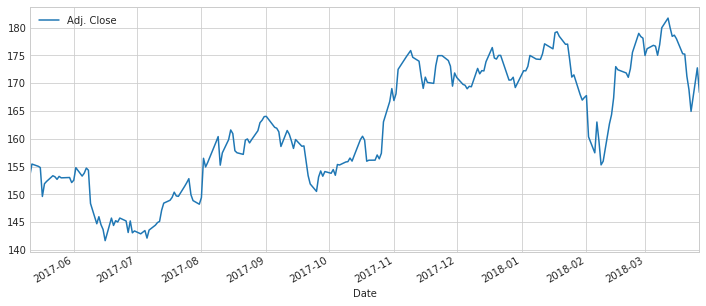

In [11]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj. Close'].plot(legend=True,figsize=(12,5))

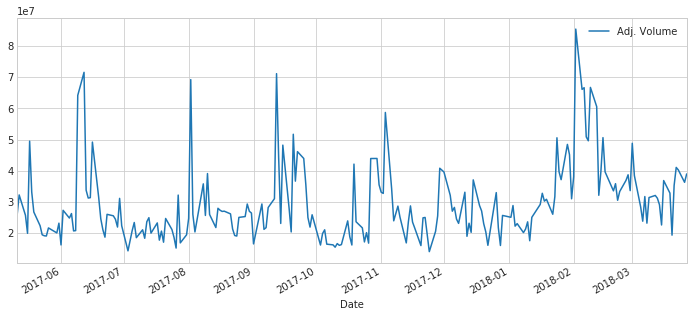

In [12]:
#Plotting the total shares being traded over time
AAPL['Adj. Volume'].plot(legend=True,figsize=(12,5))

### 2) What was the daily return average of a stock?  

In [13]:
AAPL['DailyAvgRet']=AAPL['Adj. Close'].pct_change()

In [14]:
AAPL['Totalvolclose'] = AAPL['Adj. Close'] * AAPL['Adj. Volume']

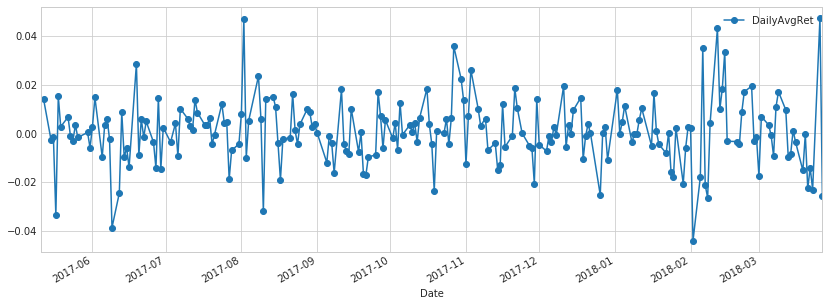

In [15]:
#Plotting the daily return
AAPL['DailyAvgRet'].plot(figsize=(14,5),legend=True,marker='o')

### 3) What was the moving average of various stocks?   

Take moving average over the period of 10,30 and 60 days.

In [16]:
mavg =[10,30,60]
for days in mavg:
    col_name = "mavg for %s days" %str(days)
    AAPL[col_name] = AAPL['Adj. Close'].rolling(window=days).mean()

In [17]:
AAPL.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,DailyAvgRet,Totalvolclose,mavg for 10 days,mavg for 30 days,mavg for 60 days
Date,,,,,,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,-0.022655,6.036815e+09,177.5530,173.082833,172.529250
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,-0.014159,6.931269e+09,176.7435,173.393000,172.426500
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,-0.023128,6.638662e+09,175.2395,173.713667,172.332667
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,0.047472,6.266820e+09,174.3445,174.273667,172.368833
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,-0.025641,6.559004e+09,173.1815,174.461333,172.323167


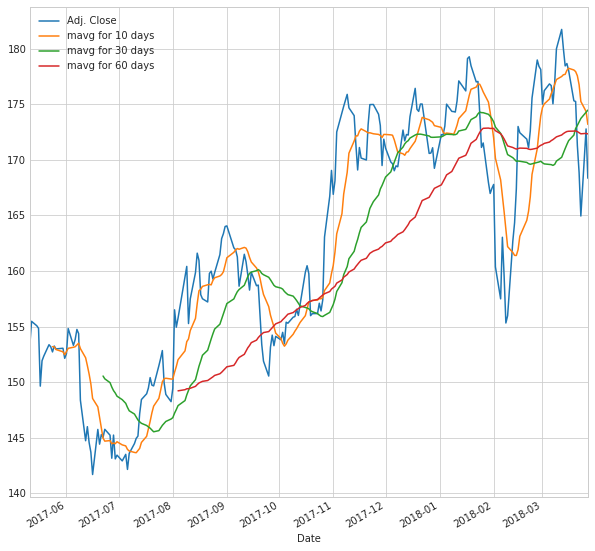

In [18]:
# Plot the moving average (mavg)
AAPL[['Adj. Close','mavg for 10 days','mavg for 30 days','mavg for 60 days']].plot(subplots=False,figsize=(10,10))

### 4) What was the correlation between daily returns of different stocks?                                                           

In [19]:
all_tech_stocks = pd.DataFrame()

In [21]:
#Using Quandl to grab the stock data
for stock in tech_list:
    all_tech_stocks[stock] = quandl.get("WIKI/"+stock, start_date=start, end_date=end)['Adj. Close']

In [22]:
all_tech_stocks = all_tech_stocks.pct_change()

In [23]:
all_tech_stocks.dropna(axis = 0,inplace = True)

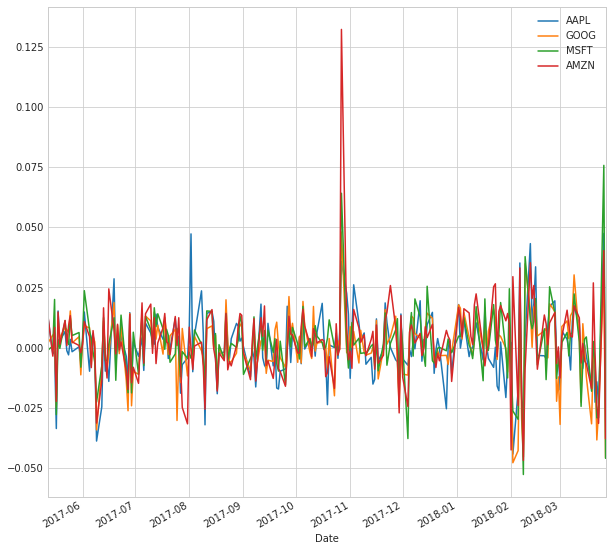

In [24]:
# Plot the daily average return for all the tech stocks
all_tech_stocks[['AAPL','GOOG','MSFT','AMZN']].plot(subplots=False,figsize=(10,10))

#### Correlation plots:

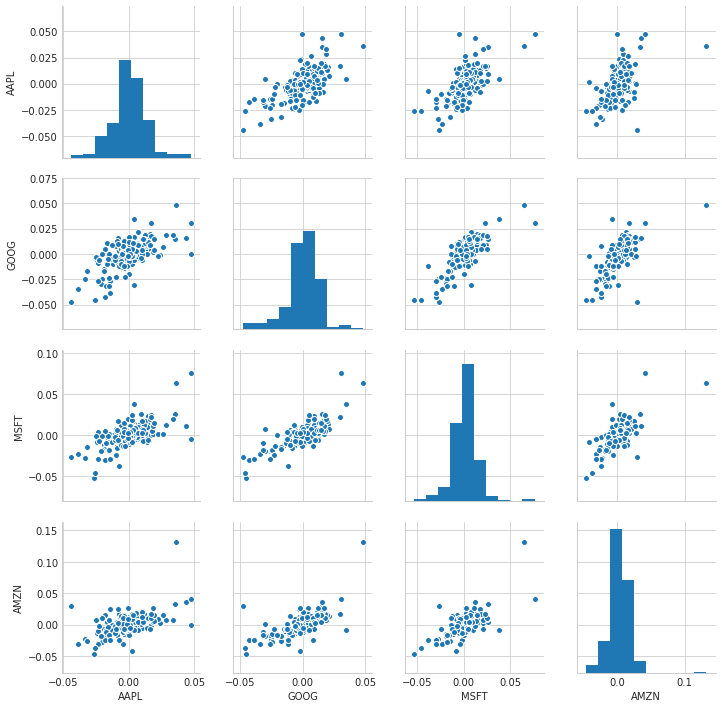

In [26]:
sns.pairplot(all_tech_stocks)

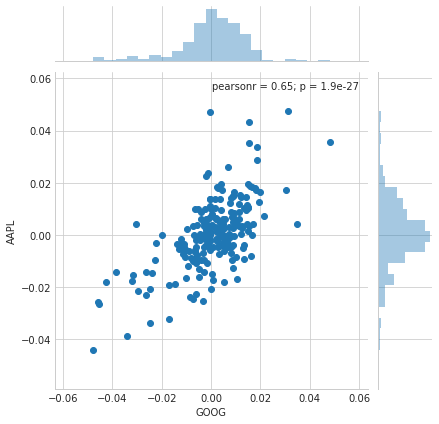

In [27]:
# Correlation between Google and apple
sns.jointplot('GOOG','AAPL',all_tech_stocks,kind='scatter')

Text(0.5,1,'Correlation between different stocks daily avg returns')

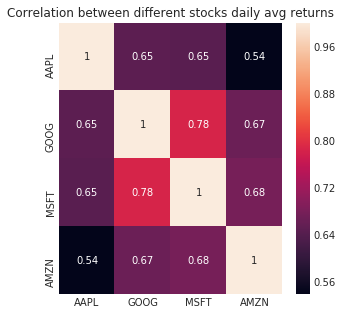

In [29]:
corr = all_tech_stocks.corr()
fig, ax = plt.subplots(figsize = (5,5))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between different stocks daily avg returns')

## Looks Google and Microsoft are highly correlated. And other tech companies also correlated positively. 

#### 5) How much value do we put at risk by investing in a particular stock? 

In [30]:
all_tech_stocks.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-05-12,0.013966,0.001741,-0.001169,0.014489
2017-05-15,-0.002562,0.005213,0.000731,-0.003516
2017-05-16,-0.001477,0.006317,0.020020,0.008455
2017-05-17,-0.033576,-0.024793,-0.027806,-0.022307
2017-05-18,0.015241,0.011548,0.003408,0.014791


In [31]:
c = [0,1,2,4]

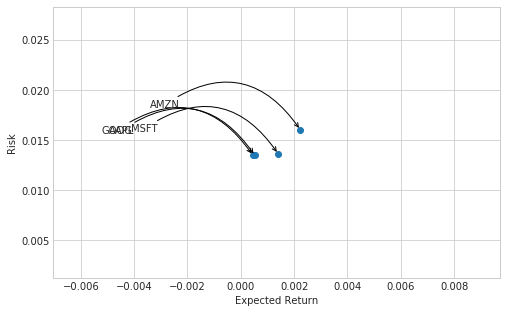

In [33]:
plt.figure(figsize=(8,5))

plt.scatter(all_tech_stocks.mean(),all_tech_stocks.std(), cmap = all_tech_stocks.columns, )

plt.xlabel('Expected Return')
plt.ylabel('Risk')
#For adding annotatios in the scatterplot
for label,x,y in zip(all_tech_stocks.columns,all_tech_stocks.mean(),all_tech_stocks.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

## Google and apple having same risk and profit. Microsoft is having more profit with less risk.
We want to invest on the stocks which having the less riska and high profit. So based on above analysis between 4 tech stock Google, apple, amazon and microsoft, Microsoft is best to invest.

### Future steps: Try to predict stock price 